In [215]:
"""
Author:
Micah Vandersteen

Date: 
13 January 2020

Purpose: 
This code is written to analyze the study of tumor carrying mice that are under various treatment regimens.

Analysis: 
After analyzing the data I came up with three observations:
1) For mice treated with the drug, Capomulin, there is a strong positive correlation between mouse weight and average
tumor volume.
2) The top four treatment regimens don't produce any outliers when observing tumor volume.
3) Both sexes of mice are represented almost equally, suggesting that results obtained could accurately describe both
male and female mice with tumors.
"""

'\nAuthor:\nMicah Vandersteen\n\nDate: \n13 January 2020\n\nPurpose: \nThis code is written to analyze the study of tumor carrying mice that are under various treatment regimens.\n\nAnalysis: \nAfter analyzing the data I came up with three observations:\n1) For mice treated with the drug, Capomulin, there is a strong positive correlation between mouse weight and average\ntumor volume.\n2) \n3)\n'

In [216]:
# IMPORTING DEPENDENCIES
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np


In [217]:
# IDENTIFYING PATH TO THE FILES NEEDED
mouse_metadata = os.path.join("data" , "Mouse_metadata.csv")
study_results = os.path.join("data" , "Study_results.csv")

In [218]:
# READING IN THE DATA INTO A DATAFRAME USING PANDAS
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [219]:
# Generate a summary statistics table consisting of the mean, median, variance,
# standard deviation, and SEM of the tumor volume for each drug regimen.

# GETTING MEAN TUMOR VOLUME
mean_tumor_volume = study_results["Tumor Volume (mm3)"].mean()

# GETTING MEDIAN TUMOR VOLUME
median_tumor_volume = np.median(study_results["Tumor Volume (mm3)"])

# GETTING VARIANCE OF TUMOR VOLUME
variance_tumor_volume = np.var(study_results["Tumor Volume (mm3)"])

# GETTING STANDARD DEVIATION OF THE TUMOR VOLUME
standard_deviation_tumor_volume = np.std(study_results["Tumor Volume (mm3)"])

# GETTING THE STANDARD ERROR OF THE MEAN OF THE TUMOR VOLUME
SEM_tumor_volume = st.sem(study_results["Tumor Volume (mm3)"])


In [220]:
# STORE THE INITIAL SUMMARY STATISTICS IN A DICTIONARY
initial_summary_dict = {
    "Mean Tumor Volume" : mean_tumor_volume,
    "Median Tumor Volume" : median_tumor_volume,
    "Variance of Tumor Volume" : variance_tumor_volume,
    "Standard Deviation of Tumor Volume" : standard_deviation_tumor_volume,
    "Standard Error of Mean of Tumor Volume" : SEM_tumor_volume
}

In [221]:
# CREATING A DATAFRAME USING THE INITIAL SUMMARY DICTIONARY
initial_summary_df = pd.DataFrame(initial_summary_dict, index= [0])

# SHOWING THE INITIAL RESULTS 
initial_summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Mean of Tumor Volume
0,50.448381,48.951474,79.07428,8.892372,0.204436


In [222]:
# ==========================================================================================
"""
This next section is meant to generate a bar plot using both Pandas's DataFrame.plot() and
Matplotlib's pyplot that shows the number of data points for each treatment regimen.
"""
# ===========================================================================================

"\nThis next section is meant to generate a bar plot using both Pandas's DataFrame.plot() and\nMatplotlib's pyplot that shows the number of data points for each treatment regimen.\n"

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


Text(0.5, 0, 'Treatment Regimen')

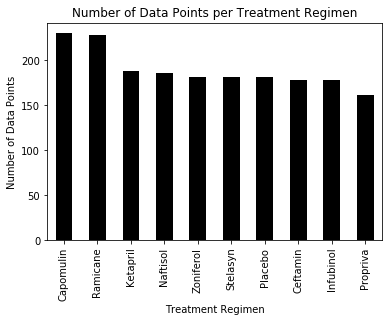

In [223]:
# GENERATING BAR PLOT OF NUMBER OF DATA POINTS PER REGIMEN USING PANDAS
# LEFT MERGING DATA ON MOUSE ID
merged_data_complete = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")

# IDENTIFYING THE DIFFERENT DRUG REGIMENS AND THEIR DATA POINT COUNT
drug_regimen_counts = merged_data_complete["Drug Regimen"].value_counts()

# PRINTING INFORMATION
print(drug_regimen_counts)

# PLOTTING BAR GRAPH USING PANDAS
drug_regimen_counts.plot(kind = 'bar', color = 'black')
plt.title('Number of Data Points per Treatment Regimen')
plt.ylabel('Number of Data Points')
plt.xlabel('Treatment Regimen')

Text(0, 0.5, 'Number of Data Points')

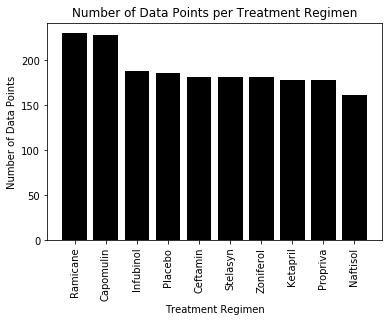

In [224]:
# GET LIST OF TREATMENT REGIMENS
drug_regimens = mouse_metadata["Drug Regimen"].unique()

# GENERATING BAR PLOT OF NUMBER OF DATA POINTS PER REGIMEN USING MATPLOTLIB
plt.bar(x = drug_regimens, height = drug_regimen_counts, color = 'black')
plt.xticks(rotation = 90)
plt.title('Number of Data Points per Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Number of Data Points')

In [225]:
# ======================================================================
"""
This next section of code is meant to generate a pie plot using both Pandas's
DataFrame.plot() and Matplotlib's pyplot that shows the distribution of 
female or male mice in the study.
"""
# ======================================================================

"\nThis next section of code is meant to generate a pie plot using both Pandas's\nDataFrame.plot() and Matplotlib's pyplot that shows the distribution of \nfemale or male mice in the study.\n"

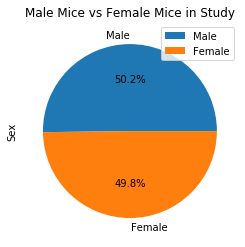

In [226]:
# MAKE A PIE CHART USING PANDAS THAT SHOWS DISTRIBUTION OF MALE VS FEMALE MICE IN STUDY

# GROUP BY SEX 
mouse_sexes = list(mouse_metadata["Sex"].unique())

# GET COUNT OF MALE AND FEMALE MICE
mouse_sex_count = mouse_metadata["Sex"].value_counts()

# CREATE PIE CHART
mouse_sex_count.plot(kind = 'pie', \
                     title = 'Male Mice vs Female Mice in Study',\
                     autopct ='%1.1f%%')
plt.legend()
plt.show()

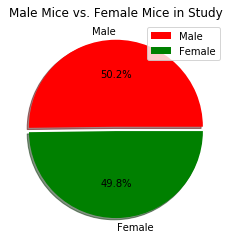

In [227]:
# MAKE A PIE CHART OF MALE AND FEMALE MICE IN THE STUDY USING MATPLOTLIB
colors = ["red", "green"]

explode = (0.05, 0)

plt.pie(mouse_sex_count, \
        explode = explode, \
        labels = mouse_sexes, \
        colors = colors, \
       autopct = "%1.1f%%", \
       shadow = True)

plt.title('Male Mice vs. Female Mice in Study')
plt.legend( loc = 'upper right')
plt.show()

In [228]:
# ===================================================================================================================
"""
This next section of code is meant to Calculate the final tumor volume of each mouse across four of the most promising
treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively 
determine if there are any potential outliers across all four treatment regimens.
"""
# ====================================================================================================================

'\nThis next section of code is meant to Calculate the final tumor volume of each mouse across four of the most promising\ntreatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively \ndetermine if there are any potential outliers across all four treatment regimens.\n'

In [229]:
# CALULATE FINAL TUMOR VOLUME OF CAPOMULIN, RAMICANE, INFUBINOL AND CEFTAMIN TREATED MICE

# MERGE THE RESULTS WITH THE METADATA
merged_mouse_data = pd.merge(study_results, \
                            mouse_metadata, \
                            how = 'outer')


# FINAL STATS OF CAPOMULIN TREATED MICE 
final_capomulin = merged_mouse_data.loc[(merged_mouse_data["Drug Regimen"] == 'Capomulin') & \
                                        (merged_mouse_data['Timepoint'] == 45)]

# GET LIST OF JUST FINAL TUMOR VOLUMES
final_capomulin_tumor_volumes = final_capomulin["Tumor Volume (mm3)"]

# FINAL STATS OF RAMICanE TREATED MICE 
final_ramicane = merged_mouse_data.loc[(merged_mouse_data["Drug Regimen"] == 'Ramicane') & \
                                     (merged_mouse_data['Timepoint'] == 45)]

# GET LIST OF JUST FINAL TUMOR VOLUMES
final_ramicane_tumor_volumes = final_ramicane["Tumor Volume (mm3)"]

# FINAL STATS OF CEFTAMIN TREATED MICE 
final_ceftamin = merged_mouse_data.loc[(merged_mouse_data["Drug Regimen"] == 'Ceftamin') & \
                                       (merged_mouse_data['Timepoint'] == 45)]

# GET LIST OF JUST FINAL TUMOR VOLUMES
final_ceftamin_tumor_volumes = final_ceftamin["Tumor Volume (mm3)"]

# FINAL STATS OF INFUBINOL TREATED MICE 
final_infubinol = merged_mouse_data.loc[(merged_mouse_data["Drug Regimen"] == 'Infubinol') & \
                                        (merged_mouse_data['Timepoint'] == 45)]

# GET LIST OF JUST FINAL TUMOR VOLUMES
final_infubinol_tumor_volumes = final_infubinol["Tumor Volume (mm3)"]


In [230]:
# CALCULATE THE QUARTILES AND IQR TO QUANTITATIVELY DETERMING IF THERE ARE POTENTIAL OUTLIERS ACROSS THE FOUR
# TREATMENT REGIMES INVESTIGATED ABOVE
# 1.5 IQR rule: Q1 - 1.5*IQR and Q3 + 1.5*IQR is range for possible outliers

# OBTAINING THE ABOVE VALUES FOR CAPOMULIN
capomulin_quartiles = final_capomulin_tumor_volumes.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

# intialize possible outlier list for capomulin 
possible_outliers_capomulin = []

for value in final_capomulin_tumor_volumes:
    if (value > (capomulin_upperq + 1.5 * capomulin_iqr)) or (value < capomulin_lowerq - 1.5 * capomulin_iqr):
        possible_outliers_capomulin.append(value)

# PRINT STATEMENT TO SHOW POSSIBLE OUTLIERS
print(f"There are {len(possible_outliers_capomulin)} outliers in the capomulin regimen.")

# ==========================================================================================================       

# OBTAINING ABOVE VALUES FOR RAMICANE
ramicane_quartiles = final_ramicane_tumor_volumes.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

# intialize possible outlier list for ramicane 
possible_outliers_ramicane = []

for value in final_ramicane_tumor_volumes:
    if (value > (ramicane_upperq + 1.5 * ramicane_iqr)) or (value < ramicane_lowerq - 1.5 * ramicane_iqr):
        possible_outliers_ramicane.append(value)

# PRINT STATEMENT TO SHOW NUMBER OF POSSIBLE OUTLIERS
print(f"There are {len(possible_outliers_ramicane)} outliers in the ramicane regimen.")

# ============================================================================================================

# OBTAINING ABOVE VALUES FOR CEFTAMIN
ceftamin_quartiles = final_ceftamin_tumor_volumes.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

# intialize possible outlier list for ceftamin 
possible_outliers_ceftamin = []

for value in final_ceftamin_tumor_volumes:
    if (value > (ceftamin_upperq + 1.5 * ceftamin_iqr)) or (value < ceftamin_lowerq - 1.5 * ceftamin_iqr):
        possible_outliers_ceftamin.append(value)

# PRINT STATEMENT TO SHOW NUMBER OF POSSIBLE OUTLIERS
print(f"There are {len(possible_outliers_ceftamin)} outliers in the ceftamin regimen.")

# =============================================================================================================

# OBTAINING ABOVE VALUES FOR INFUBINOL
infubinol_quartiles = final_infubinol_tumor_volumes.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

# intialize possible outlier list for infubinol 
possible_outliers_infubinol = []

for value in final_infubinol_tumor_volumes:
    if (value > (infubinol_upperq + 1.5 * infubinol_iqr)) or (value < infubinol_lowerq - 1.5 * infubinol_iqr):
        possible_outliers_infubinol.append(value)

# PRINT STATEMENT TO SHOW NUMBER OF POSSIBLE OUTLIERS
print(f"There are {len(possible_outliers_infubinol)} outliers in the infubinol regimen.")



There are 0 outliers in the capomulin regimen.
There are 0 outliers in the ramicane regimen.
There are 0 outliers in the ceftamin regimen.
There are 0 outliers in the infubinol regimen.


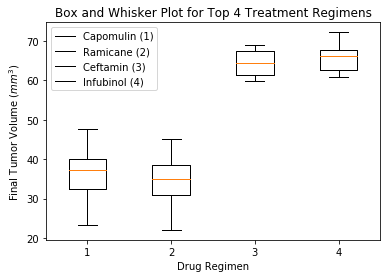

In [231]:
# pyplot.boxplot()
# CREATING FIGURE WILL ALL FOUR BOXPLOTS ON ONE AXES
data = [final_capomulin_tumor_volumes, \
        final_ramicane_tumor_volumes, \
        final_ceftamin_tumor_volumes,\
        final_infubinol_tumor_volumes]

labels = ['Capomulin (1)', 'Ramicane (2)', 'Ceftamin (3)', 'Infubinol (4)']

fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Box and Whisker Plot for Top 4 Treatment Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume ($mm^3$)')
plt.legend(labels)

plt.show()


In [232]:
# ================================================================================================================
"""
This next section of code is meant to generate a line plot of time point versus tumor volume for a single mouse 
treated with Capomulin.
"""
# ================================================================================================================

'\nThis next section of code is meant to generate a line plot of time point versus tumor volume for a single mouse \ntreated with Capomulin.\n'

There were 25 mice treated with Capomulin.
We are obtaining a line plot of time vs tumor volume for mouse: u364.


Text(0, 0.5, 'Tumor Volume ($mm^3$)')

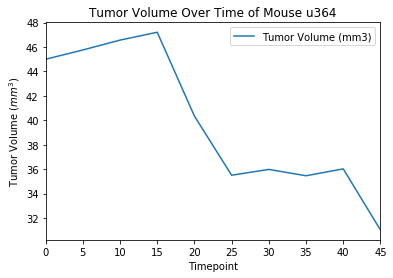

In [233]:
# GET MOUSE ID LIST OF MICE TREATED WITH CAPOMULIN
capomulin_mice = list(mouse_metadata.loc[mouse_metadata["Drug Regimen"] == 'Capomulin']["Mouse ID"])
print(f"There were {len(capomulin_mice)} mice treated with Capomulin.")

# CHOOSING A MOUSE ID
print(f"We are obtaining a line plot of time vs tumor volume for mouse: {capomulin_mice[4]}.") 

# GET TIME DATA (X AXIS)
time_data = list(study_results["Timepoint"].unique())

# GET TUMOR VOLUME OF TIME FOR SELECTED MOUSE 
selected_capomulin_mouse = study_results.loc[study_results["Mouse ID"] == capomulin_mice[4], :]
selected_capomulin_mouse_cleaned = selected_capomulin_mouse[["Timepoint", "Tumor Volume (mm3)"]]

# SHOW PLOT
selected_capomulin_mouse_cleaned.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.title(f"Tumor Volume Over Time of Mouse {capomulin_mice[4]}")
plt.ylabel('Tumor Volume ($mm^3$)')

In [234]:
# ================================================================================================================
"""
This next section of code is meant to generate a scatter plot of mouse weight versus average tumor volume for the 
Capomulin treatment regimen.
"""
# ================================================================================================================

'\nThis next section of code is meant to generate a scatter plot of mouse weight versus average tumor volume for the \nCapomulin treatment regimen.\n'

Text(0, 0.5, 'Average Tumor Volume ($mm^3$)')

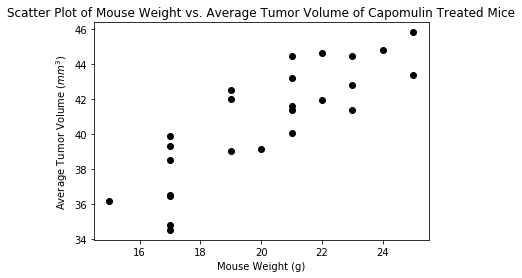

In [235]:
# GET MICE WEIGHTS FOR CAPOMULIN REGIMEN
capomulin_mice_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == 'Capomulin',:]

# MERGE STUDY RESULTS WITH CAPOMULIN MICE
capomulin_mice_merged = pd.merge(study_results, \
                            capomulin_mice_df, \
                            on = 'Mouse ID')

# GET MEAN TUMOR VOLUME AND WEIGHT FOR EACH CAPOMULIN MOUSE
capomulin_mice_merged_mean = capomulin_mice_merged.groupby("Mouse ID").mean()
mean_tumor_volume_capomulin = capomulin_mice_merged_mean["Tumor Volume (mm3)"]
weight_capomulin = capomulin_mice_merged_mean["Weight (g)"]

# GENERATE SCATTER PLOT WITH LABELS
plt.scatter(weight_capomulin, mean_tumor_volume_capomulin, color = 'black')
plt.title('Scatter Plot of Mouse Weight vs. Average Tumor Volume of Capomulin Treated Mice')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^3$)')

In [236]:
# ================================================================================================================
"""
This next section of code is meant to calculate the correlation coefficient and linear regression model between 
mouse weight and average tumor volume for the Capomulin treatment then plot the linear regression model on top of the 
previous scatter plot. 
"""
# ================================================================================================================

'\nThis next section of code is meant to calculate the correlation coefficient and linear regression model between \nmouse weight and average tumor volume for the Capomulin treatment then plot the linear regression model on top of the \nprevious scatter plot. \n'

The correlation coefficient between mouse weight and mean tumor volumeof mice treated with capomulin is: 0.842


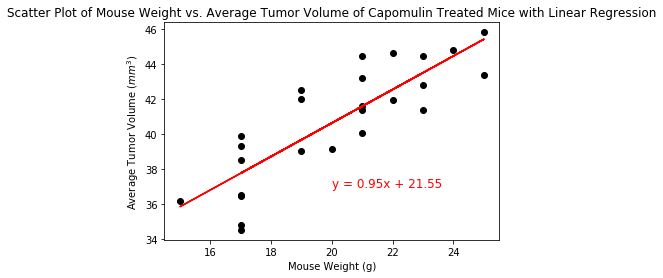

In [237]:
# CALCULATING CORRELATION COEFFICIENT BETWEEN MOUSE WEIGHT AND MEAN TUMOR VOLUME OF CAPOMULIN MICE
correlation_coefficient = st.pearsonr(x = weight_capomulin, y = mean_tumor_volume_capomulin)

# PRINTING INFO ON PEARSON R
print(f"The correlation coefficient between mouse weight and mean tumor volume\
of mice treated with capomulin is: {round(correlation_coefficient[0], 3)}")

# CALCULATING LINEAR REGRESSION BETWEEN MOUSE WEIGHT AND MEAN TUMOR VOLUME OF CAPOMULIN MICE
x_values = weight_capomulin
y_values = mean_tumor_volume_capomulin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# GENERATE SCATTER PLOT WITH LABELS INCLUDING LINEAR REGRESSION
plt.scatter(weight_capomulin, mean_tumor_volume_capomulin, color = 'black')
plt.title('Scatter Plot of Mouse Weight vs. Average Tumor Volume of Capomulin Treated Mice \
with Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^3$)')

# LINEAR REGRESSION PART
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20, 37), fontsize=12, color="red")
plt.show()